In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import pickle as pkl

from joint_log_lik import joint_log_lik
from sample_topic_assignment import sample_topic_assignment


bagofwords = loadmat('bagofwords_nips.mat')
WS = bagofwords['WS'][0] - 1  #go to 0 indexed
DS = bagofwords['DS'][0] - 1

WO = loadmat('words_nips.mat')['WO'][:,0]
titles = loadmat('titles_nips.mat')['titles'][:,0]

In [3]:
#This script outlines how you might create a MCMC sampler for the LDA model

alphabet_size = WO.size

document_assignment = DS
words = WS

#subset data, EDIT THIS PART ONCE YOU ARE CONFIDENT THE MODEL IS WORKING
#PROPERLY IN ORDER TO USE THE ENTIRE DATA SET
words = words[document_assignment < 100]
document_assignment  = document_assignment[document_assignment < 100]

n_docs = document_assignment.max() + 1

#number of topics
n_topics = 20

#initial topic assigments
topic_assignment = np.random.randint(n_topics, size=document_assignment.size)

#within document count of topics
doc_counts = np.zeros((n_docs,n_topics))

for d in range(n_docs):
    #histogram counts the number of occurences in a certain defined bin
    doc_counts[d] = np.histogram(topic_assignment[document_assignment == d], bins=n_topics, range=(-0.5,n_topics-0.5))[0]

#doc_N: array of size n_docs count of total words in each document, minus 1
doc_N = doc_counts.sum(axis=1) - 1

#within topic count of words
topic_counts = np.zeros((n_topics,alphabet_size))

for k in range(n_topics):
    w_k = words[topic_assignment == k]

    topic_counts[k] = np.histogram(w_k, bins=alphabet_size, range=(-0.5,alphabet_size-0.5))[0]



#topic_N: array of size n_topics count of total words assigned to each topic
topic_N = topic_counts.sum(axis=1)

In [4]:
infile = open("results_ugm", "rb")
results_dict = pkl.load(infile)

In [5]:
infile.close()

In [6]:
results_dict

{'best_topic_assignment': array([ 5,  6, 13, ...,  6, 12,  8]),
 'best_words': array([2992, 1115, 1213, ...,   19,  687,  186], dtype=uint16),
 'best_document_assignment': array([ 954,  258,   30, ...,  566,  731, 1173], dtype=uint16),
 'best_topic_counts': array([[   0.,    0., 4490., ...,    0.,    0.,    0.],
        [   0.,    0., 2575., ...,    0.,    0.,    0.],
        [   0.,  210., 2233., ...,    0.,    0.,    0.],
        ...,
        [   0.,    0.,  960., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    6.,    0.,    0.],
        [  49.,  521.,    0., ...,    0.,    0.,    0.]]),
 'best_doc_counts': array([[  0.,   0.,  50., ...,   0.,  44., 224.],
        [  0.,   0., 125., ...,  12., 144.,   0.],
        [  3.,   0.,   0., ...,   0.,  99.,  81.],
        ...,
        [348.,   0.,   0., ...,   3.,  79.,  15.],
        [  3.,  25.,   0., ...,   0.,  34., 154.],
        [280.,  31.,   1., ...,   0.,  69.,  34.]]),
 'best_topic_N': array([126536., 112987., 1301

In [7]:
topic_assignment = results_dict["best_topic_assignment"]
words = results_dict["best_words"]
document_assignment = results_dict["best_document_assignment"]
topic_counts = results_dict["best_topic_counts"]
doc_counts = results_dict["best_doc_counts"]
topic_N = results_dict["best_topic_N"]
jll = results_dict["jll"]
best_jll = results_dict["best_jll"]

In [8]:
x_axis = [i for i in range(len(jll))]

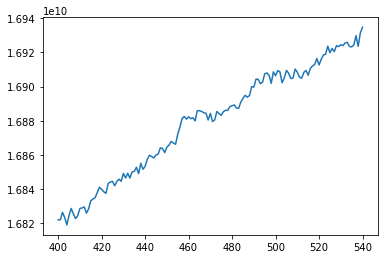

In [11]:
plt.plot(x_axis[400:], jll[400:])

In [37]:
probable_words = [None]*20
for i in range(topic_counts.shape[0]):
    word_frequency = topic_counts[i, :]
    top_indices = np.argsort(word_frequency)[::-1][:10]
    top_words = []
    for j in range(10):
        top_words.append(WO[top_indices[j]][0])
    probable_words[i] = top_words
    
fstr = ''

for i in range(topic_counts.shape[0]):
    fstr += "Topic " + str(i+1) + ":" + '\n\n'
    for j in range(10):
        fstr += probable_words[i][j] + '\n'
    fstr += '\n'
    
print(fstr)

Topic 1:

model
data
models
probability
distribution
gaussian
parameters
likelihood
mixture
density

Topic 2:

data
error
model
training
set
prediction
regression
noise
test
kernel

Topic 3:

neurons
neuron
model
synaptic
cell
input
activity
firing
spike
cells

Topic 4:

data
algorithm
set
classification
class
training
problem
classifier
examples
number

Topic 5:

dynamics
energy
noise
field
point
equations
order
time
state
phase

Topic 6:

model
control
eye
motor
position
map
system
figure
head
movement

Topic 7:

network
learning
units
input
training
networks
output
hidden
weights
layer

Topic 8:

information
noise
data
analysis
signal
component
linear
components
independent
correlation

Topic 9:

function
algorithm
vector
learning
problem
space
matrix
gradient
linear
point

Topic 10:

learning
state
time
action
reinforcement
policy
control
states
function
optimal

Topic 11:

input
distance
sequence
vectors
space
sequences
vector
structure
rbf
rules

Topic 12:

analog
circuit
chip
in

In [28]:
probable_words

[['model',
  'data',
  'models',
  'probability',
  'distribution',
  'gaussian',
  'parameters',
  'likelihood',
  'mixture',
  'density'],
 ['data',
  'error',
  'model',
  'training',
  'set',
  'prediction',
  'regression',
  'noise',
  'test',
  'kernel'],
 ['neurons',
  'neuron',
  'model',
  'synaptic',
  'cell',
  'input',
  'activity',
  'firing',
  'spike',
  'cells'],
 ['data',
  'algorithm',
  'set',
  'classification',
  'class',
  'training',
  'problem',
  'classifier',
  'examples',
  'number'],
 ['dynamics',
  'energy',
  'noise',
  'field',
  'point',
  'equations',
  'order',
  'time',
  'state',
  'phase'],
 ['model',
  'control',
  'eye',
  'motor',
  'position',
  'map',
  'system',
  'figure',
  'head',
  'movement'],
 ['network',
  'learning',
  'units',
  'input',
  'training',
  'networks',
  'output',
  'hidden',
  'weights',
  'layer'],
 ['information',
  'noise',
  'data',
  'analysis',
  'signal',
  'component',
  'linear',
  'components',
  'independent',

In [26]:
WO[6][0]

'function'

In [51]:
fstr = ''
first_doc = doc_counts[0, :]
other_docs = doc_counts[1:, :]
similarity = np.sum(first_doc*other_docs, axis=1)
most_similar_indices = np.argsort(similarity)[::-1][:10] + 1

for i in range(10):
    fstr += titles[most_similar_indices[i]][0] + '\n\n'
    
print(fstr)

Computing with Almost Optimal Size Neural Networks 

Lower Bounds on the Complexity of Approximating Continuous Functions by SigmoidaI Neural Networks,

The Power of Approximating: A Comparison of Activation Functions

On Properties of Networks of Neuron-Like Elements 

For Valid Generalization, the Size of the Weights is More Important than the Size of the Network

ON THE COMPUTATIONAL COMPLEXITY OF NETWORKS OF SPIKING NEURONS 

What Size Net Gives Valid Generalization? 

Analog Neural Networks of Limited Precision I: Computing with Multilinear Threshold Functions 

Neural Networks with Quadratic VC Dimension 

Almost Linear VC Dimension Bounds for Piecewise Polynomial Networks,


